In [54]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

header=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
        'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data= pd.read_csv("housing.csv",names=header, delim_whitespace=True)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [55]:
data.shape

(506, 14)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<AxesSubplot:>

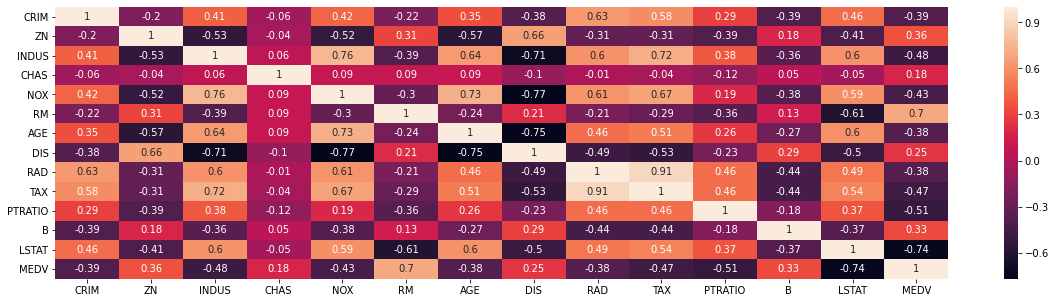

In [57]:
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(20, 5))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [58]:
#drop features with correlation less than absolute 0.3

#data= pd.DataFrame(data)
x=list(np.where(abs(correlation_matrix['MEDV'])>0.3))
print("removed features: "+ data.columns[np.where(abs(correlation_matrix['MEDV'])<=0.3)] )
x=np.asarray(x)[0]
data= data[data.columns[x]]
data

Index(['removed features: CHAS', 'removed features: DIS'], dtype='object')


,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,1,273.0,21.0,393.45,6.48,22.0


In [59]:
from sklearn.model_selection import train_test_split

# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [60]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.4,
                                                    random_state=0)
X_crossVal,X_test,y_crossVal, y_test=  train_test_split(X_test,
                                                    y_test,
                                                    test_size=0.5,
                                                    random_state=0)
# Get dimensions of X_train and X_test
X_train.shape, X_crossVal.shape,X_test.shape

((303, 11), (101, 11), (102, 11))

In [61]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_crossVal_scaled= scaler.transform(X_crossVal)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_crossVal_scaled=pd.DataFrame(X_crossVal_scaled, columns=X_crossVal.columns)
X_test_scaled =  pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.shape, X_crossVal_scaled.shape, X_test_scaled.shape

((303, 11), (101, 11), (102, 11))

In [62]:
X_train_scaled

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
0,-0.391295,2.783002,-1.364814,-1.294732,1.359719,-1.090107,-0.846144,-0.437276,-2.657817,0.367509,-0.826100
1,-0.119218,-0.494857,1.205419,2.675413,-0.244908,1.078473,-0.500150,-0.002925,-1.705528,-2.251168,2.150046
2,-0.239649,-0.494857,1.205419,0.414045,-0.334677,1.078473,-0.500150,-0.002925,-1.705528,-0.089974,-0.852798
3,-0.203193,-0.494857,1.205419,2.675413,-0.256129,0.983575,-0.500150,-0.002925,-1.705528,0.135842,0.224966
4,-0.379371,0.406555,-0.747161,-1.065195,0.255837,-1.979331,-0.269487,-0.431406,0.289742,0.416231,-0.927272
...,...,...,...,...,...,...,...,...,...,...,...
298,-0.362684,-0.494857,-0.530840,-0.538109,-0.836824,0.175191,-0.500150,-0.683799,0.516478,0.354732,-0.106654
299,-0.385606,1.348939,-1.091566,-1.014187,1.225065,-1.511873,-0.500150,-0.032273,-1.478793,0.347089,-1.353038
300,-0.378130,-0.494857,-0.156548,-0.079035,-0.397796,0.466912,-0.384819,0.167293,-0.299770,0.395094,-0.308998
301,-0.369034,-0.494857,-0.597729,-0.920672,-0.385172,0.568839,-0.730813,-1.000758,-0.254422,0.373958,0.885395


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
error=[]
minerror= 99999999
degree_with_lowest_error=0
for i in range(1,9):
    poly = PolynomialFeatures(degree = i)

    X_poly = poly.fit_transform(X_train_scaled)
   
    
    lin = LinearRegression()
    lin.fit(X_poly, y_train)
    pred= lin.predict(poly.fit_transform(X_crossVal_scaled))
    error_value=mean_squared_error(y_crossVal,pred)
    if minerror> error_value:
        minerror=error_value
        degree_with_lowest_error=i
        
    error.append(mean_squared_error(y_crossVal,pred))

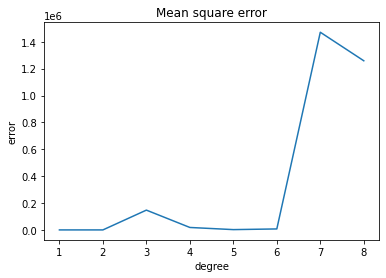

In [65]:
x_axis= list(range(1,9))
plt.plot(x_axis, error)
plt.title('Mean square error')
plt.xlabel('degree')
plt.ylabel('error')
plt.show()

In [67]:
error

[28.568619130897012,
 19.735876883338772,
 147362.56228313484,
 18278.33468024385,
 2269.0412597867166,
 7304.462288035254,
 1470879.5275119804,
 1258586.2334517085]

In [66]:
print("degree with lowest mean square error: "+str(degree_with_lowest_error) +"  with error value: "+ str(minerror))

degree with lowest error: 2  with error value: 19.735876883338772


In [68]:
#testing with degree 2
poly = PolynomialFeatures(degree = 2)

X_poly = poly.fit_transform(X_train_scaled)


lin = LinearRegression()
lin.fit(X_poly, y_train)
pred= lin.predict(poly.fit_transform(X_test_scaled))
error_value=mean_squared_error(y_test,pred)
error_value

19.70198203656071

In [86]:
from sklearn.linear_model import Ridge

A_values=[0.00001,0.0001,0.001,0.01,0.1,1]
error_array=[]
minerror= 99999999
a_with_lowest_error=0

for a in A_values:
    model = Ridge(alpha=a)
    
    poly = PolynomialFeatures(degree = 2)

    X_poly = poly.fit_transform(X_train_scaled)

    model.fit(X_poly, y_train)
    y_pred = model.predict(poly.fit_transform(X_test_scaled))
    error_value=mean_squared_error(y_test,y_pred)
    error_array.append(error_value)
    
    if minerror> error_value:
        minerror=error_value
        a_with_lowest_error=a

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


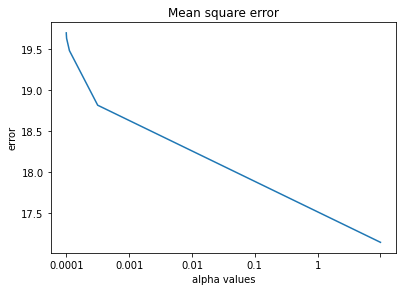

In [87]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(A_values, error_array)
ax.set_title('Mean square error')
ax.set_xlabel('alpha values')
ax.set_xticklabels(A_values)
ax.set_ylabel('error')
plt.show()

In [88]:
print("Regularization parameter alpha with lowest mean square error: "+str(a_with_lowest_error) +"  with error value: "+ str(minerror))

Regularization parameter alpha with lowest mean square error: 1  with error value: 17.140657305462465
